In [0]:
# Média ponderada: de acordo com o tamanho de cada amostra.
# Quando não pode calcular a média: usa Mediana. Vai tirando as extremidadesde um lado e de outro,
#   o que sobrar é a mediana. Se for par, pega os 2 do meio e faz a média deles.

# Variável ordinal: plota histograma e verifica como a destribuição se comporta, e vê
#  se é a média ou a mediana que se aproxima mais da realidade.

# Média: é suceptiva à mudanças. Melhor para observar mudanças.

# 1 - Introduction 

In the previous mission, we learned about the **mean** and worked with a data set on **house sale prices:**

| |Order | PID | MS SubClass | MS Zoning | Lot Frontage | Lot Area | Street | Alley | Lot Shape | Mo Sold | Yr Sold | Sale Type | Sale Condition | SalePrice |        
|-------|-----|-------------|-----------|--------------|----------|--------|-------|-----------|---------|---------|-----------|----------------|-----------|--------|
| 0     | 1   | 526301100   | 20        | RL           | 141.0    | 131770 | Pave  | NaN       | 0       | 5       | 2010      | WD             | Normal    | 215000 |
| 1     | 2   | 526350040   | 20        | RH           | 80.0     | 11622  | Pave  | NaN       | 0       | 6       | 2010      | WD             | Normal    | 105000 |
| 2     | 3   | 526351010   | 20        | RL           | 81.0     | 14267  | Pave  | NaN       | 12500   | 6       | 2010      | WD             | Normal    | 172000 |
| 3     | 4   | 526353030   | 20        | RL           | 93.0     | 11160  | Pave  | NaN       | 0       | 4       | 2010      | WD             | Normal    | 244000 |
| 4     | 5   | 527105010   | 60        | RL           | 74.0     | 13830  | Pave  | NaN       | 0       | 3       | 2010      | WD             | Normal    | 189900 |


In one of the steps, we computed the mean sale price and found it to be approximately 180796:

Let's say that instead of the above data set, we only have the following summary table based on it:

|  |Year | Mean Price | Houses Sold   |    
|------|------------|---------------|-----|
| 0    | 2006       | 181761.648000 | 625 |
| 1    | 2007       | 185138.207493 | 694 |
| 2    | 2008       | 178841.750804 | 622 |
| 3    | 2009       | 181404.567901 | 648 |
| 4    | 2010       | 172597.598240 | 341 |

Once again, our task is to find the **mean** house sale price across all years. Intuitively, we just need to find the mean of the Mean Price column. Let's do that and see it the result matches what we got first from computing the mean of the SalePrice column in the original data set.

In [0]:
import pandas as pd
import numpy as np

houses = pd.read_csv("AmesHousing_1.txt",sep='\t')


houses_per_year = houses.pivot_table(index="Yr Sold",
                   values=["SalePrice"],
                   aggfunc=[np.mean,np.count_nonzero])

houses_per_year.columns = houses_per_year.columns.droplevel(0)
houses_per_year.columns = ["Mean_Price", "Houses_Sold"]
houses_per_year.index.name = "Year"

print(houses_per_year.Mean_Price.loc[2006])

houses_per_year.head()

181761.648


,Mean_Price,Houses_Sold
Year,,
2006,181761.648000,625
2007,185138.207493,694
2008,178841.750804,622
2009,181404.567901,648
2010,172597.598240,341


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Compute the **mean** of the **Mean_Price** column in the **houses_per_year** data set. Assign the value to a variable named **mean_new.**
  - Note that **houses_per_year** is a DataFrame object, so you can use directly the **Series.mean()** method.
- Compute the **mean** of the **SalePrice** column in the **houses** data set. Assign the value to a variable named **mean_original**.
- Measure the difference between the two means, and assign the result to a variable named **difference**. If they are equal, the difference should be 0.
  - For answer checking purposes use **mean_original - mean_new**, not **mean_new - mean_original**.

In [0]:
# put your code here
mean_new = houses_per_year.Mean_Price.sum()/len(houses_per_year.Mean_Price)
mean_original = houses.SalePrice.mean()
difference = mean_original - mean_new
difference

847.3055805878539

# 2 - Different Weights

Rather counterintuitively, we noticed in the previous exercise that the **mean** of the **Mean_Price** column is not equal to that of the **SalePrice** column. The root of the problem is related to the fact that we have different number of houses sold each year (notice the **Houses_Sold** column):

|| Year | Mean Price | Houses Sold   |     
|------|------------|---------------|-----|
| 0    | 2006       | 181761.648000 | 625 |
| 1    | 2007       | 185138.207493 | 694 |
| 2    | 2008       | 178841.750804 | 622 |
| 3    | 2009       | 181404.567901 | 648 |
| 4    | 2010       | 172597.598240 | 341 |

Because each year has a different number of sold houses, the mean of sale prices for each individual year weighs differently in the overall mean. But when we computed the mean of the **Mean_Price** column, we gave each year the same weight because we added all the five mean prices and then divided by 5.


To understand why it's wrong to give each year an equal weight, let's begin thinking of the problem on a smaller scale. Consider these two samples of $n=5$ and $n=2$ (remember that $n$ gives the number of sample points) which contain sale prices for year 2009 and 2010:

<img width="400" src="https://drive.google.com/uc?export=view&id=1vJ-XZuudNu6ZswNttpOiXgzQh2EEByQR">

To find the mean across years 2009 and 2010, we can add the five prices for 2009 with the two prices for 2010, and then divide by 7 (because we have 7 prices in total):

<img width="600" src="https://drive.google.com/uc?export=view&id=1ZXjwAUI9rdKXrrNxBzs45dtUhFqorTcf">


Notice in the numerator that year 2009 has a greater contribution (1413860) than year 2010 (274000). If we took instead the mean for each year individually, add the two means and divide their sum by 2, then we'd give each year the same weight. This is wrong, and it leads to a wrong result for the overall mean:

<img width="600" src="https://drive.google.com/uc?export=view&id=1WRDHodJ7mip-HEE-ErT49MQ5WRDgg5ca">


This is the same mistake we made in the previous exercise: we gave each year the same weight. To compute the correct overall mean, we need to:

  - Find the sum of prices for each year individually. For instance, 341 houses were sold in 2010 and each house had an average price of approximately 172598. The sum of prices for year 2010 is $341 \times 172,598 = 58,855,918$ .
  - Add all the sums together.
  - Divide the final sum by the number of houses sold (not by the number of years) to find the mean sale price per house.
  
**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Using only the data we have in the **houses_per_year** data set, compute the sum of prices for each year.
- Add all the sums together.
- Divide the final sum by the total number of houses sold. Assign the result to a variable named **weighted_mean.**
- Compute again the mean of the **SalePrice** column in the **houses** data set. Assign the value to a variable named **mean_original**.
- Round each mean value to 10 decimal places to get rid of minor rounding errors and then measure the difference between the two means. Assign the result to a variable named **difference**. If the two means are equal, you should get a difference of 0.




In [0]:
# put your code here
weighted_sum = []
for mean,weight in zip(houses_per_year["Mean_Price"],houses_per_year["Houses_Sold"]):
  weighted_sum.append(mean * weight)

weighted_sum_final = sum(weighted_sum)/sum(houses_per_year["Houses_Sold"])
weighted_sum_final = round(weighted_sum_final, 10)

mean_original = houses.SalePrice.mean()

difference = weighted_sum_final - mean_original
difference

0.0

# 3 - The Weighted Mean

When we take into account the **different weights** and compute the **mean** like we did in the previous exercise, we call that mean the **weighted mean**. Just as the arithmetic mean we learned about in the previous mission, the weighted mean can be easily defined algebraically.

In the previous exercise, we compute the weighted mean for this distribution of sample means:

<img width="600" src="https://drive.google.com/uc?export=view&id=14UslWSJlTA1QnKpHT6x0zu1_sD-Fekt3">

We multiplied each value by the number of houses sold in that year to take into account the different weights, then we summed up the products and divided by the total number of houses. This is the distribution of weights we used:

<img width="150" src="https://drive.google.com/uc?export=view&id=1zstMfEQ-CK3HxepZF-Vbq__OwHbPHSN9">

Now imagine that instead of the actual values, we have six unknown prices, which we'll abbreviate with $x$, and six unknown corresponding weights which we'll abbreviate with $w$:

<img width="150" src="https://drive.google.com/uc?export=view&id=1VUT3lBdjbPkxFN7nqQJtU2x0dGneAxA1">

To find the weighted mean, we need to:

- Multiply each $x$ value (mean house price) by its corresponding weight value $w$  (total number of houses sold): $x_1 \times w_1$, $x_2 \times w_2$, $x_3 \times w_3$, $x_4 \times w_4$, $x_5 \times w_5$ and $x_6 \times w_6$.
- Add the products together (for convenience we drop the multiplication sign $\times$): $x_1w_1 + x_2w_2 + x_3w_3 + x_4w_4 + x_5w_5 + x_6w_6$. Divide the sum of the products by the sum of the weights (that is, the total number of houses sold) to get the weighted mean:

<img width="550" src="https://drive.google.com/uc?export=view&id=1Qc1Arb2bgVBBxa7fa2Hi4Il2VfaZSIQi">

The equation above only works if we have six mean values and six weights. We can easily extend the equation, however, to account for any number of mean values and weights:

<img width="350" src="https://drive.google.com/uc?export=view&id=1FwoIHItR-9DlY2Qa89hsGWDseXPPXDdN">

This is how the formula above would work if we had three mean values and three weights:

<img width="450" src="https://drive.google.com/uc?export=view&id=1WjMAIeGRunpuJtrW499yLbPa_zUHpwgZ">


We learned previously to condense sums using $\displaystyle \sum_{i=1}^n$ , so the formula above becomes:

<img width="200" src="https://drive.google.com/uc?export=view&id=1as-N0qbhf5UT_QZ2zFQ9OAiJSTc5Sl6P">


The weighted mean can be abbreviated just like the arithemtic mean: $\overline{x}$  for samples, and $\mu$ for populations. Strictly speaking, the formula above gives the weighted mean for a sample because we used $n$, not $N$. To get the formula for a population, we simply have to change $n$ to $N$:

<img width="100" src="https://drive.google.com/uc?export=view&id=1z2VJhYwgVzxvkZcDoMKHY8NjYom3gEe2">

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Write a function that computes the weighted mean for any array of numbers.
  - The function should take in two arrays: one array containing the mean values, and another array with the corresponding weights.
  - The function returns the weighted mean.
- Use the function you wrote to compute the weighted mean for the **Mean_Price** column in the **houses_per_year** data set. Assign the result to a variable named **weighted_mean_function**.
- Use the **numpy.average()** function to compute the weighted mean for the same **Mean_Price** column. Read the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html) to figure out how you can pass in the weights. Assign the result to a variable named **weighted_mean_numpy.**
- Compare the two weighted means (the one from your function and the one from **np.average()**) using the == operator. **Round** (round()) each mean to 10 decimal places to get rid of minor rounding errors. Assign the result to a variable named **equal**.

In [0]:
# put your code here
def weighted_mean(mean_values, weights):
  all_sums = []
  for mean,weight in zip(mean_values, weights):
    all_sums.append(mean * weight)
  return sum(all_sums)/sum(weights)

weighted_mean_function = weighted_mean(houses_per_year["Mean_Price"], houses_per_year["Houses_Sold"])

import numpy as average
weighted_mean_numpy = np.average(houses_per_year["Mean_Price"],
                              weights = houses_per_year["Houses_Sold"])

equal = (round(weighted_mean_function, 10) == round(weighted_mean_numpy, 10))
print("Equal: ", equal)

Equal:  True


# 4 - The Median for Open-ended Distributions

While learning about the weighted mean we saw that there are distributions where it's possible to compute the mean, although that wouldn't be correct. There are distributions, however, where it's impossible to compute the mean. Consider for instance the frequency distribution of the **TotRms AbvGrd** variable, which describes the number of rooms above ground:

In [0]:
houses['TotRms AbvGrd'].value_counts()

6             844
7             649
5             586
8             347
4             203
9             143
10 or more    131
3              26
2               1
Name: TotRms AbvGrd, dtype: int64

The lowest boundary of the distribution is well-defined — the lowest value is 2 and no value in the distribution can be lower than that. But the upper boundary is not defined as precisely — the highest value is "10 or more" which means that houses can actually have 10, 11, 15, or even more rooms. The upper boundary ("10 or more") is thus open, and for this reason we say that the TotRms AbvGrd variable has an **open-ended distribution.**


It's still reasonable to want to find an average value (a single representative value) for this distribution, but "10 or more" is not numerical, which makes it impossible to compute the mean. Remember that the definition of the mean is $\displaystyle \frac{\sum_{i=1}^n x_i}{n}$, so we can't compute the $\displaystyle \sum_{i=1}^n$ part because of the "10 or more" value.

A common workaround is to sort all the values in the distribution in an ascending order and then select the middle value as the most representative value of the distribution. Consider this sample of 5 values from the **TomRms AbvGrd** column:

<img width="200" src="https://drive.google.com/uc?export=view&id=1R_Ld0t6Z2qh8b3BcRdJ4d_vF2otgfcJi">

First, we need to order the values in an ascending order:

<img width="200" src="https://drive.google.com/uc?export=view&id=1P7FaM90RH2ML8n6ZPyg9mvoUBR9suYol">

This distribution has five values and the middle one is the third one because it divides the distribution in two halves of equal length. The third value is $7$, and the two resulting halves are $[5,6]$  and $[7, \text{10 or more}]$ . We call this middle value the **median**, so for this case the median is 7.

<img width="200" src="https://drive.google.com/uc?export=view&id=1_XG2GxK-FGqG8RWk-BzAu12UvKqw6zN7">

Let's practice computing medians for a few distributions before finding the median of the **TotRms AbvGrd** above.


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- Compute the median for each of the three distributions we already defined in the code editor.
  - Assign the median of **distribution1** to a variable named **median1.**
  - Assign the median of **distribution2** to a variable named **median2.**
  - Assign the median of **distribution3** to a variable named **median3.**
What is the median of the distribution [3, 7, 2, 12]? You don't have to write an answer for this question, but it'd be we useful to consider it before continuing to the next screen.

In [0]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

# put your code here
median1 = "20 years or lower"
median2 = 123
median3 = "5 books or lower"

 # 5 - Distributions with Even Number of Values

When a distribution has an even number of values, it's not clear which is the middle one. Consider this sorted distribution with 6 values:

<img width="200" src="https://drive.google.com/uc?export=view&id=1EQl8XFWYq3x5Odw4N6uN1UgUjmAEBDMz">

It's impossible to choose a value from this distribution that divides the distribution in two halves of equal length. The workaround is to take the two middle values and compute their mean. The two middle values are $[7,7]$, and the two resulting halves are:  $[5,6]$ and $[8,\text{10 or more}]$.

<img width="200" src="https://drive.google.com/uc?export=view&id=1aOXTXMRAxfjuhM2kq4wxHgo4LyVvap_e">

The median is the mean of the two middle values, that is $\frac{7+7}{2} = 7$

This value of 7 is the average value of the distribution above. In statistics, the term **"average"** refers to the most representative value of a distribution. Although it's common to use "average" and "mean" interchangeably, **"average" is not restricted to refer only to the mean**. Depending on the context, it can also refer to the **median** or the **mode**.

For the mean, we learned that there are special symbols like $\overline{x}$  or $\mu$. For the median, there's no widely accepted standard notation — most commonly, both the sample and the population median are simply denoted with the word **median**.

Unlike the mean, the median doesn't have a neat way to be defined algebraically. This is because sorting a distribution in an ascending order and then choosing a middle value or two doesn't involve any arithmetic. The different treatment for odd and even-numbered distributions also poses some theoretical challenges for constructing a single definition.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Find the median value of the **TotRms AbvGrd** column.
  - Sort the values in the column in ascending order.
    - Replace the **'10 or more'** value with the integer __10__ using the [Series.replace()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.replace.html) method. We do this only for sorting purposes. To avoid modifying the data in the original data set, make a copy of the column using the [Series.copy()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.copy.html) method and save it to a distinct variable.
    - Convert the column to the int type using the **Series.astype()** method.
    - Sort the values in ascending order using the **Series.sort_values()** method.
- Depending on whether the distribution has an odd or even number of values, find the median and assign it to a variable named **median.**

In [0]:
# put your code here
TotRms_AbvGrd = houses["TotRms AbvGrd"].copy()
TotRms_AbvGrd = TotRms_AbvGrd.replace({"10 or more": 10})
TotRms_AbvGrd = TotRms_AbvGrd.astype(int)
TotRms_AbvGrd = TotRms_AbvGrd.sort_values()

#Achando a mediana:
indices = [int(len(TotRms_AbvGrd)/2), int((len(TotRms_AbvGrd)/2)+1)]

median = (TotRms_AbvGrd.iloc[indices]).sum()/2
print("Median: ", median)

Median:  6.0


# 6 - The Median as a Resistant Statistic

When we compute the mean, we account equally for each value in the distribution — we sum up all the values in the distribution and then divide the total by the number of values we added. When we compute the median, however, we don't consider equally each value in the distribution. In fact, we only consider the middle value (or the middle two values).

This property makes the median more resistant to changes in the data compared to the mean. Let's consider this simple distribution:

$$
[2,3,5,5,10]
$$

Both the median and the mean of this distribution are 5. Let's change the last value in the distribution from 10 to 1000:

$$
[2,3,5,5,1000]
$$

The median is still 5, but the mean is now 203. This is because the mean takes into account every value in the distribution, while the median considers only the middle value. Because the **median** is so resistant to changes in the data, it's classified as a **resistant** or **robust statistic**.


This property makes the median ideal for finding reasonable averages for distributions containing outliers. Consider this distribution of annual salaries for five people in a company:

$$
[20000,34000,40000,45000,800000]
$$

The mean is heavily influenced by the person winning 800,000, and it amounts to a value of 187,000, which is not representative for anyone — the first four people win much less that 187,000, and the last person wins much more. It makes more sense to compute a median value for this distribution, and report that the average salary in the company is 40,000, accompanied by an outlier of 800,000.

<img width="400" src="https://drive.google.com/uc?export=view&id=1oSculDf-HwF2A_bdAwGhpvNTuWxJBqpO">


**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">


- The **Lot Area** and **SalePrice** variables have outliers. Confirm this information by visualizing the distributions using a box plot. Remember from the previous course that outliers will appear as dots on the graph.
  - You can use the **Series.plot.box()** method.
- Compute the **median** and the **mean** for each of the two variables.
  - Because the variables are numerical, you can use the **Series.median()** method and the **Series.mean()** method.
- For each variable, compute the difference between the **mean** and the **median**. For answer checking purposes, use **mean - median**, not **median - mean**.
  - Assign the difference for the **Lot Area** column to a variable named **lotarea_difference.**
  - Assign the difference for the **SalePrice** column to a variable named **saleprice_difference.**
  - Inspect the differences. Do you find the differences large?

Lot Area difference:  3680.71
Sale Price difference:  20796.06


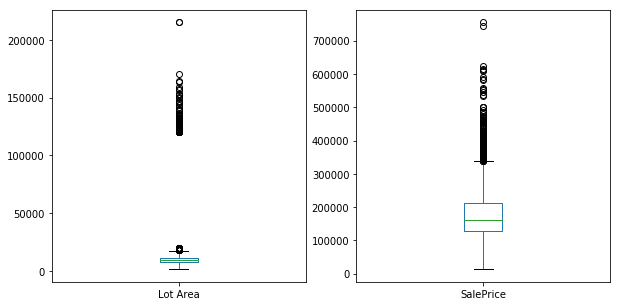

In [0]:
# put your code here
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
houses["Lot Area"].plot.box(ax = ax[0])
houses["SalePrice"].plot.box(ax = ax[1])

mean_lotarea = houses["Lot Area"].mean()
median_lotarea = houses["Lot Area"].median()
mean_saleprice = houses["SalePrice"].mean()
median_saleprice = houses["SalePrice"].median()

lotarea_difference = mean_lotarea - median_lotarea
saleprice_difference = mean_saleprice - median_saleprice

print("Lot Area difference: ", round(lotarea_difference, 2))
print("Sale Price difference: ", round(saleprice_difference, 2))

# 7 - The Median for Ordinal Scales

Data points belonging to ordinal variables are often coded using numbers. Consider the frequency distribution of the **Overall Cond** variable, which rates the overall condition of a house:


In [0]:
houses['Overall Cond'].value_counts().sort_index()

In the [documentation](https://s3.amazonaws.com/dq-content/307/data_description.txt), we can find that each numerical value corresponds to a specific quality level:

| Code | Quality        |
|------|----------------|
| 1    | Very poor      |
| 2    | Poor           |
| 3    | Fair           |
| 4    | Below average  |
| 5    | Average        |
| 6    | Above average  |
| 7    | Good           |
| 8    | Very good      |
| 9    | Excellent      |
| 10   | Very excellent |

Because words like "fair" or "average" are coded with numbers, it becomes mathematically possible to compute the mean. But whether or not it's theoretically sound to compute the mean for ordinal variables is contentious. Below we explore one argument against computing the mean, and in the next section we'll explore an argument that supports the idea of using the mean.

Remember from the previous course that if two data points are measured on an ordinal scale and there's a difference between them, we can tell the direction of the difference, but we don't know the size of the difference.

<img width="400" src="https://drive.google.com/uc?export=view&id=1WD9RZE-JqdOBPkFS-CEqNuxmDms-S6Yp">

If the overall condition of a house is rated with an 8 (Very good), and another house gets a 4 (Below average), we can't say that the conditions of the former are twice as better than the latter. The most we can say is that the house which got an 8 has better conditions (we can't quantify how much better — it could be twice as better, three times as better, 1.5 times as better, we simply don't know).

This should be more clear if we consider the fact that the numbers used to encode the quality levels ("Poor", "Fair", "Good", etc.) are chosen arbitrarily. Instead of numbers from 1 to 10, we could have numbers from 30 to 40, or from 50 to 70 in steps of 2, or from 0 to 9:


| Code | Quality        |
|------|----------------|
| 0    | Very poor      |
| 1    | Poor           |
| 2    | Fair           |
| 3    | Below average  |
| 4    | Average        |
| 5    | Above average  |
| 6    | Good           |
| 7    | Very good      |
| 8    | Excellent      |
| 9    | Very excellent |


Inside the framework of a 0-9 system, an "Excellent" label would be encoded as a 8, and a "Below average" as a 3. If we took ratios, we'd reach different conclusions for different encoding systems:
  - For a 1-10 encoding system, the conditions of an "Excellent" (9) house would be 2.25 times as better than those of a "Below average" (4) house ($\frac{9}{4}=2.25$).
For a 0-9 encoding system, the same "Excellent" (8) house would have conditions that are 2.67 times as better than the conditions of a "Below average" (3) house ($\frac{8}{3}=2.67$). 

It can be argued thus that the numerical values of an ordinal variable are not subject to meaningful arithmetical operations. But computing the mean involves meaningful arithmetical operations, so it's not theoretically sound to use the mean for ordinal variables.

Because the median doesn't involve arithmetical operations, it's considered a better alternative to the mean. This doesn't fully apply, however, to even-numbered distributions, where we need to take the mean of the middle two values to find the median. This poses some theoretical problems, and we'll see in the next mission that the **mode** might be a better choice in this case as a measure of average.

**Exercise**

<img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ">

- Find the **mean** and the **median** of the **Overall Cond** variable.
  - Assign the **mean** to a variable named **mean**.
  - Assign the **median** to a variable named **median**.
- Plot a histogram to visualize the distribution of the **Overall Cond** variable. Between the **mean** and the **median**, which one do you think describes better the shape of the histogram?
  - If you think it's the **mean**, assign the string **'mean'** to a variable named **more_representative**, otherwise assign **'median'**.

Mean:  5.563139931740614
Median:  5.0


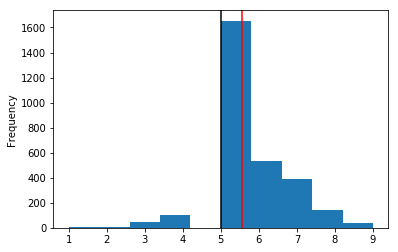

More representative -> Mean: 5.563139931740614


In [0]:
# put your code here
mean = houses["Overall Cond"].mean()
median = houses["Overall Cond"].median()

print("Mean: ", mean)
print("Median: ", median)

fig, ax = plt.subplots()
houses["Overall Cond"].plot.hist()
ax.axvline(mean, color="red")
ax.axvline(median, color="black")
plt.show()

more_representative = mean
print("More representative -> Mean:", more_representative)

# 8 - Sensitivity to Changes

Although it can be argued that it's theoretically unsound to compute the mean for ordinal variables, in the last exercise we found the mean more informative and representative than the median. The truth is that in practice many people get past the theoretical hurdles and use the mean nonetheless because in many cases it's much richer in information than the median.

Let's consider a situation where the mean is arguably a much better choice to measure the average of an ordinal variable. Let's say we're working for an online real estate company which allows customers to buy, sell, and rent houses. The speed on our website is important for all of our customers, and we want to measure how the customers perceive the speed on the website.

We sample randomly 10 customers and have them assess the following sentence: "The website is very fast, usually a new page loads in less than a second". The customers can choose between the following answers, which we plan to code under the hood with numbers between 1 and 5:

| Code | Answer                     |
|------|----------------------------|
| 1    | Strongly disagree          |
| 2    | Disagree                   |
| 3    | Neither agree nor disagree |
| 4    | Agree                      |
| 5    | Strongly agree             |

The survey yielded the distribution below, whose mean and median have both a value of 2:

$$
[1,1,1,2,2,2,2,3,3,3]
$$

After being presented with the results, the engineering team implemented a few changes meant to improve speed, and now we repeat the survey on another random sample of 10 customers and get these results:

$$
[1,2,2,2,2,2,4,5,5,5]
$$

The median is still 2, and it suggests that nothing changed. The mean, however, went up to 3, suggesting that the changes our engineers made have had a positive effect. Unlike the median, the mean is sensitive to small changes in the data, and this property is what makes it more useful in this case.

It should be clear by now that whether we should use the mean for ordinal data is contentious. In practice, you should be flexible and make your choice on a case by case basis. Also, you are not constrained to choose one metric or the other — you can choose both the mean and median to describe a distribution.

# 9 - Next steps

In this mission, we learned about the weighted mean and the median. We saw that for some distributions computing the mean is possible but incorrect. As an alternative, we learned about the weighted mean.

We saw that it's impossible to compute the mean for open-ended distributions and introduced the median as an alternative. For ordinal data, if we encode the attributes with numbers it becomes possible to compute the mean, but this is contentious and raises theoretical issues.

In the next mission, we continue the discussion about finding averages for ordinal data and also learn new things, like finding the average value for nominal variables.
